# 패키지

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler
# 데이터 분할
from sklearn.model_selection import train_test_split
# Logistic Regression
from sklearn.linear_model import LogisticRegression as LR
# 성능 평가
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

# 데이터

In [3]:
df_raw = pd.read_csv('./diabetes.csv')
import copy
df = copy.deepcopy(df_raw)
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# 성능 평가 함수

In [20]:
# 성능 평가
def clf_eval(Y_test, y_pred = None, y_pred_proba = None) :
    cm = confusion_matrix(Y_test, y_pred)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    roc_auc = roc_auc_score(Y_test, y_pred_proba)
    # 결과 출력
    print('오차행렬\n', cm)
    print('\n정확도 : {:.4f}\n정밀도 : {:.4f}\n재현율 : {:.4f}\nF1 : {:.4f}\nAUC : {:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

# roc_curve
def roc_curve_plot(Y_test, pred_proba_class1) :
    # TPR, FPR 값 반환
    fprs, tprs, thresholds = roc_curve(Y_test, pred_proba_class1)
    # ROC curve
    plt.plot(fprs, tprs, label = 'ROC')
    # 가운데 점선
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    # X 축 Scale 0.1 단위로 조정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    # X,Y 축 이름
    plt.xlabel('FPR( 1 - Sensitivity )');plt.ylabel('TPR( Recall )')
    # 그래프 출력
    plt.legend();plt.show()    

# 데이터 분할

In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
# 설명변수, 목표변수 데이터 구분
df_x = df.iloc[:, :-1]
df_y = df.iloc[:, -1]
# 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 156, stratify = df_y)
print('train data X size :', X_train.shape)
print('train data Y size :', Y_train.shape)
print('test data X size :', X_test.shape)
print('test data Y size :', Y_test.shape)

train data X size : (614, 8)
train data Y size : (614,)
test data X size : (154, 8)
test data Y size : (154,)


# Modeling

In [23]:
# Logistic Regression
lr = LR(solver = 'liblinear')
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:,1]
# 결과 확인
clf_eval(Y_test, y_pred, y_pred_proba)

오차행렬
 [[87 13]
 [22 32]]

정확도 : 0.7727
정밀도 : 0.7111
재현율 : 0.5926
F1 : 0.6465
AUC : 0.8083


### ROC curve 그래프

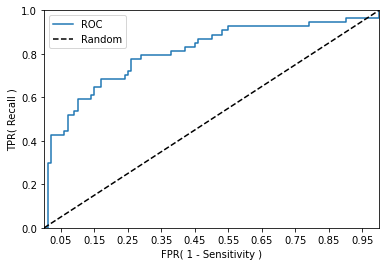

In [24]:
roc_curve_plot(Y_test, y_pred_proba)

# 데이터 스케일링

In [26]:
# scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_x)
# 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, df_y, test_size = 0.2, random_state = 156, stratify = df_y)
# Logistic Regression
lr = LR(solver = 'liblinear')
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:,1]
# 결과 확인
clf_eval(Y_test, y_pred, y_pred_proba)

오차행렬
 [[90 10]
 [21 33]]

정확도 : 0.7987
정밀도 : 0.7674
재현율 : 0.6111
F1 : 0.6804
AUC : 0.8059


# Trade off

In [31]:
# Trade off 함수
def eval_by_threshold(Y_test, y_pred_proba, thresholds) :
    # thresholds 값을 차례로 수행
    for i in thresholds :
        binarizer = Binarizer(threshold = i).fit(y_pred_proba)
        i_predict = binarizer.transform(y_pred_proba)
        print('임곗값 :', i)
        clf_eval(Y_test, y_pred, y_pred_proba)
        print('\n')

thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]
y_pred_proba = lr.predict_proba(X_test)
from sklearn.preprocessing import Binarizer
eval_by_threshold(Y_test, y_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값 : 0.3
오차행렬
 [[90 10]
 [21 33]]

정확도 : 0.7987
정밀도 : 0.7674
재현율 : 0.6111
F1 : 0.6804
AUC : 0.8059


임곗값 : 0.33
오차행렬
 [[90 10]
 [21 33]]

정확도 : 0.7987
정밀도 : 0.7674
재현율 : 0.6111
F1 : 0.6804
AUC : 0.8059


임곗값 : 0.36
오차행렬
 [[90 10]
 [21 33]]

정확도 : 0.7987
정밀도 : 0.7674
재현율 : 0.6111
F1 : 0.6804
AUC : 0.8059


임곗값 : 0.39
오차행렬
 [[90 10]
 [21 33]]

정확도 : 0.7987
정밀도 : 0.7674
재현율 : 0.6111
F1 : 0.6804
AUC : 0.8059


임곗값 : 0.42
오차행렬
 [[90 10]
 [21 33]]

정확도 : 0.7987
정밀도 : 0.7674
재현율 : 0.6111
F1 : 0.6804
AUC : 0.8059


임곗값 : 0.45
오차행렬
 [[90 10]
 [21 33]]

정확도 : 0.7987
정밀도 : 0.7674
재현율 : 0.6111
F1 : 0.6804
AUC : 0.8059


임곗값 : 0.48
오차행렬
 [[90 10]
 [21 33]]

정확도 : 0.7987
정밀도 : 0.7674
재현율 : 0.6111
F1 : 0.6804
AUC : 0.8059


임곗값 : 0.5
오차행렬
 [[90 10]
 [21 33]]

정확도 : 0.7987
정밀도 : 0.7674
재현율 : 0.6111
F1 : 0.6804
AUC : 0.8059




* 임곗값 0.48에서 가장 좋은 성능을 보이고 있음